# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

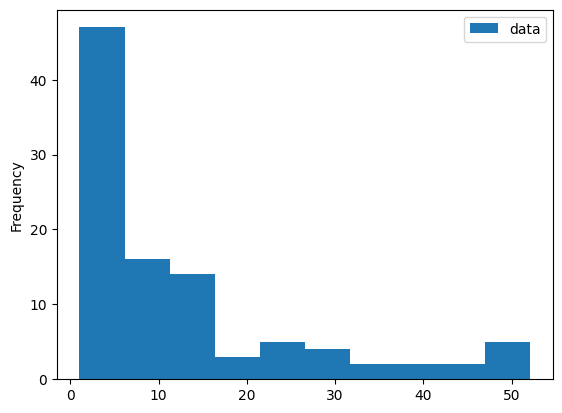

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

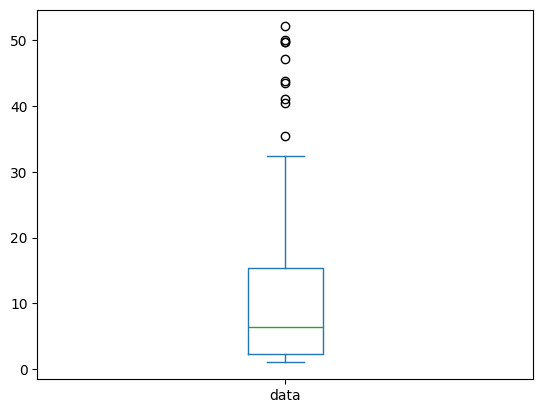

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Transfering the dataset from the tsv file
clinical_data = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
clinical_data.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


In [23]:
# Listing out the variables from the dataset

clinical_data.columns.tolist()
clinical_data.reset_index(inplace=False)


,level_0,index,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,0,0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,...,140.500000,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,1,1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,...,84.633333,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,2,2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,...,153.300000,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,3,3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,...,164.933333,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,4,4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,...,18.800000,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,2504,2504,brca_metabric,MTS-T2428,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,...,5.000000,1:Recurred,1,Primary,Female,NaN,2.615035,27.0,1.0,NaN
2505,2505,2505,brca_metabric,MTS-T2429,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,...,16.400000,1:Recurred,1,Primary,Female,NaN,5.230071,28.0,2.0,NaN
2506,2506,2506,brca_metabric,MTS-T2430,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,...,NaN,NaN,1,Primary,Female,NaN,7.845106,NaN,0.0,NaN
2507,2507,2507,brca_metabric,MTS-T2431,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,...,NaN,NaN,1,Primary,Female,NaN,9.152624,NaN,0.0,NaN


# The next section includes the visualizations for the datasets, and some of them are listed as shown:

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


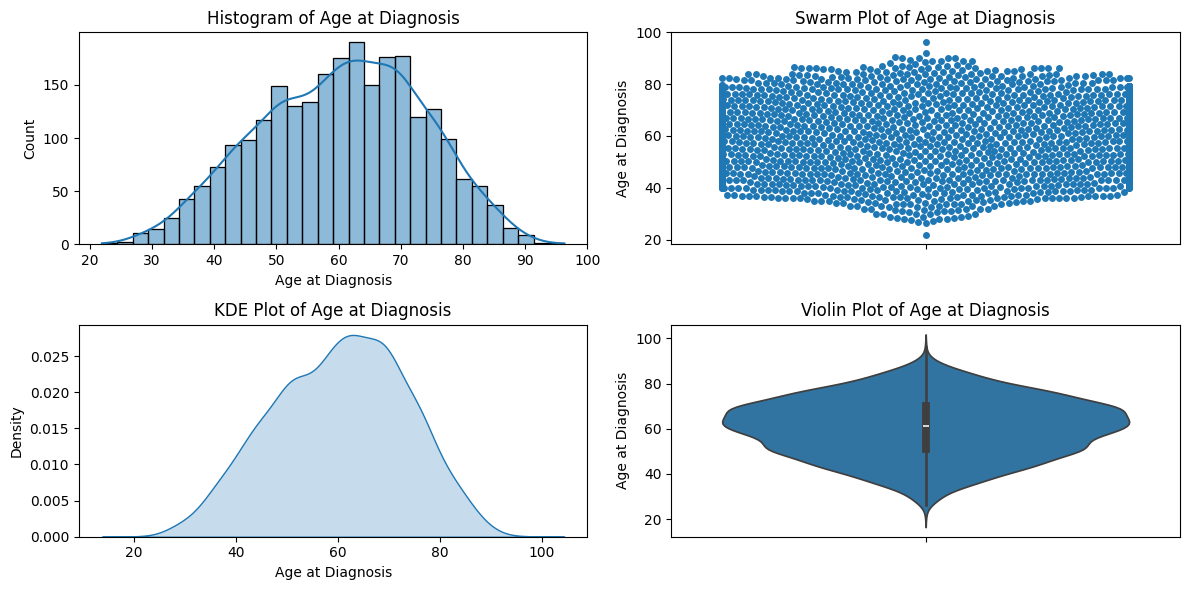

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 92.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


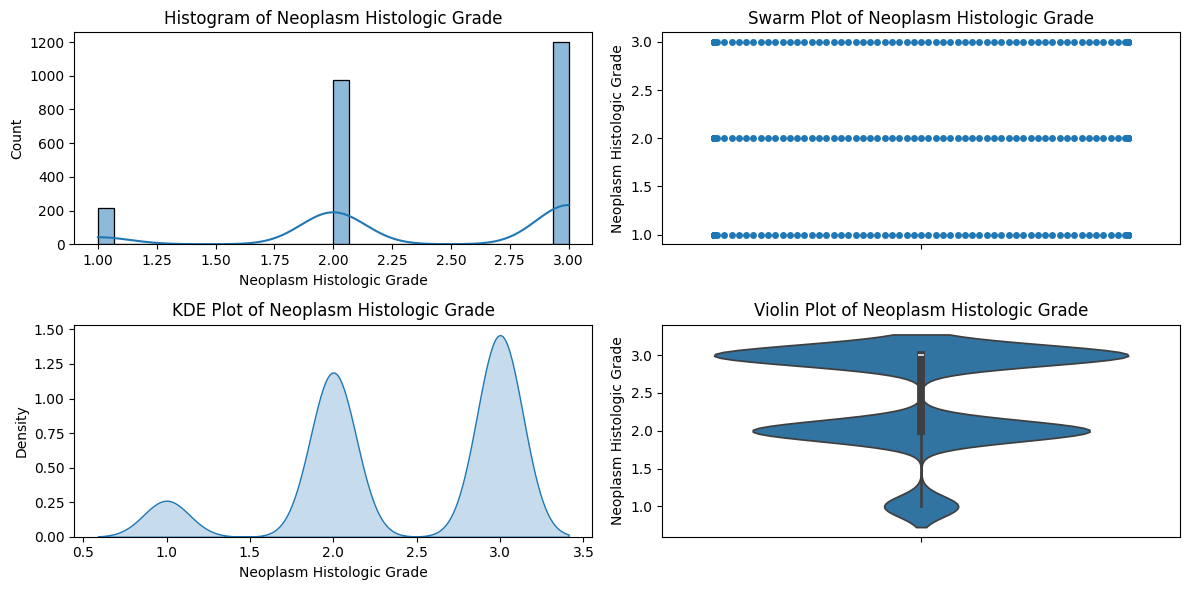

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


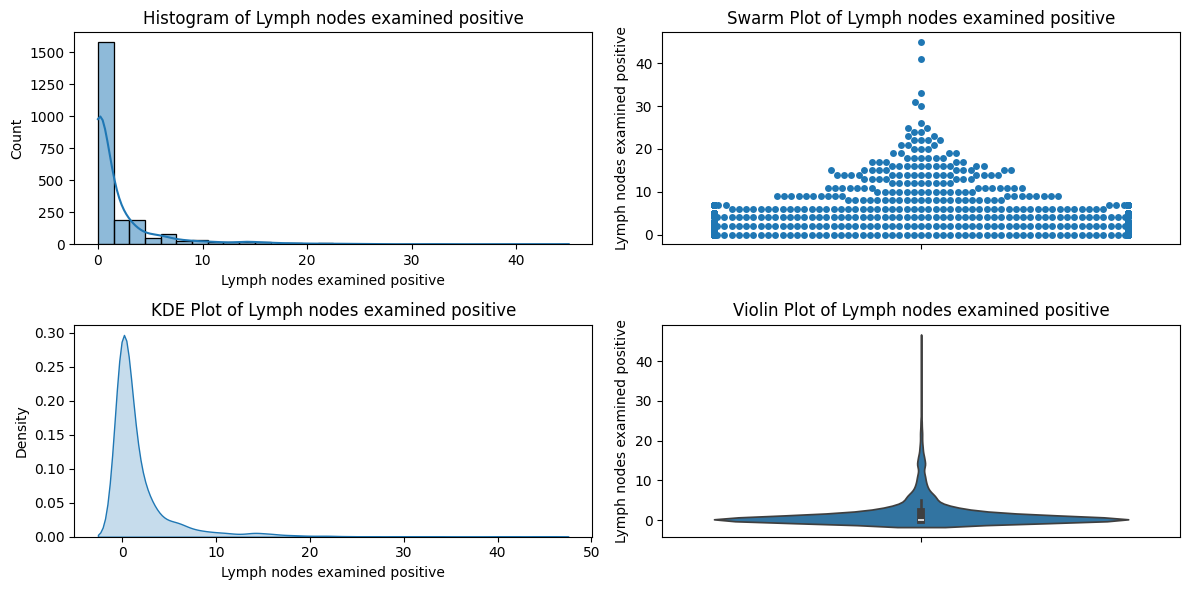

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


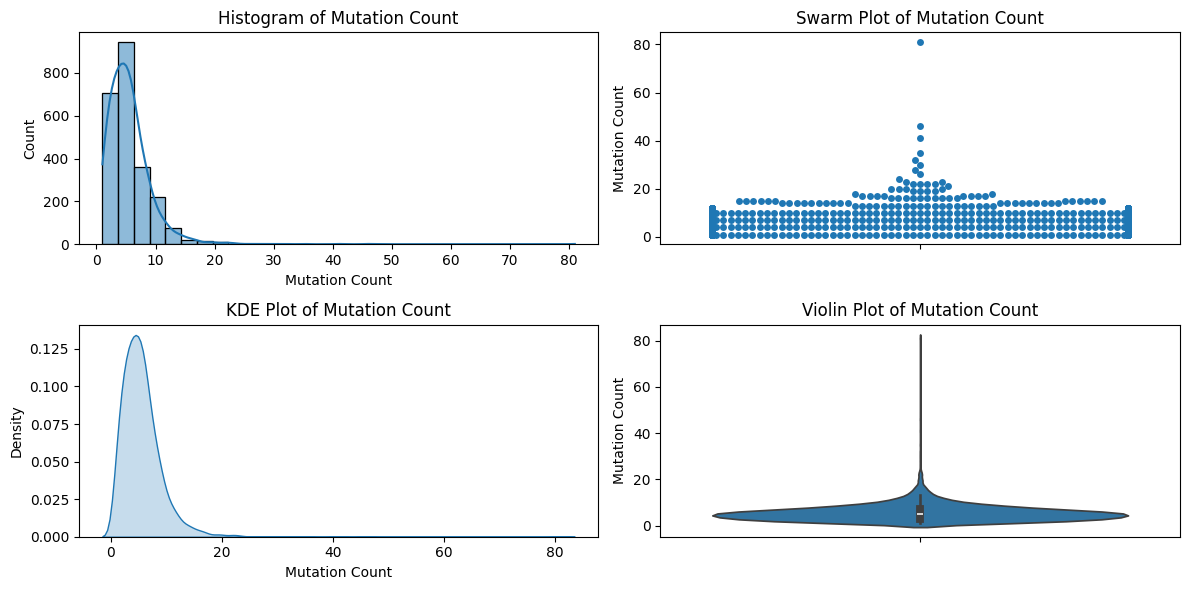

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


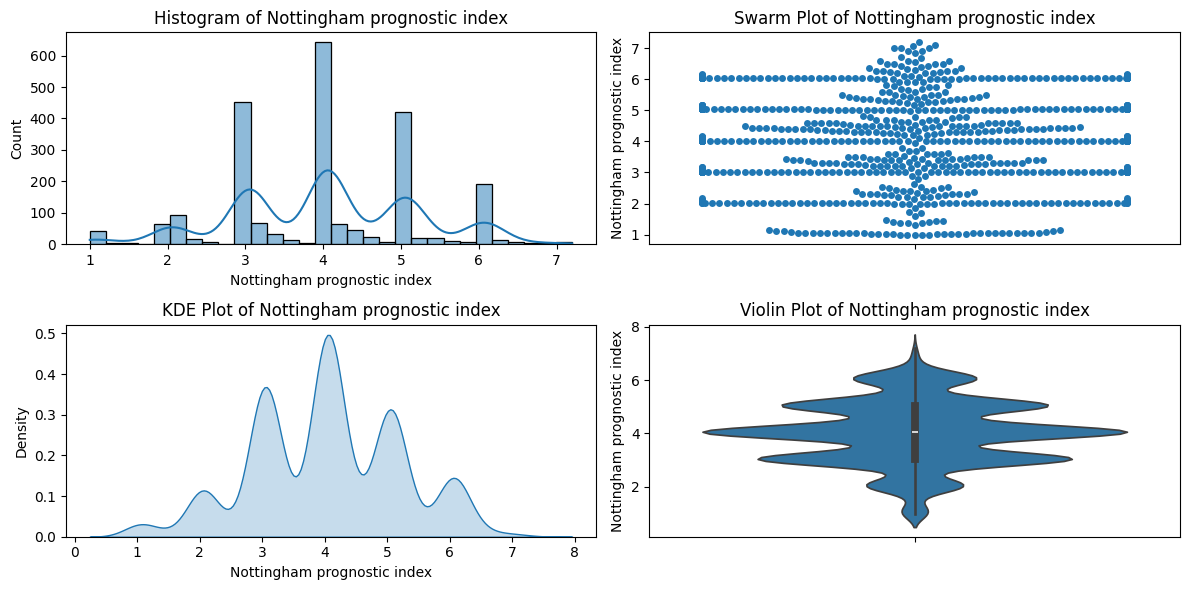

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


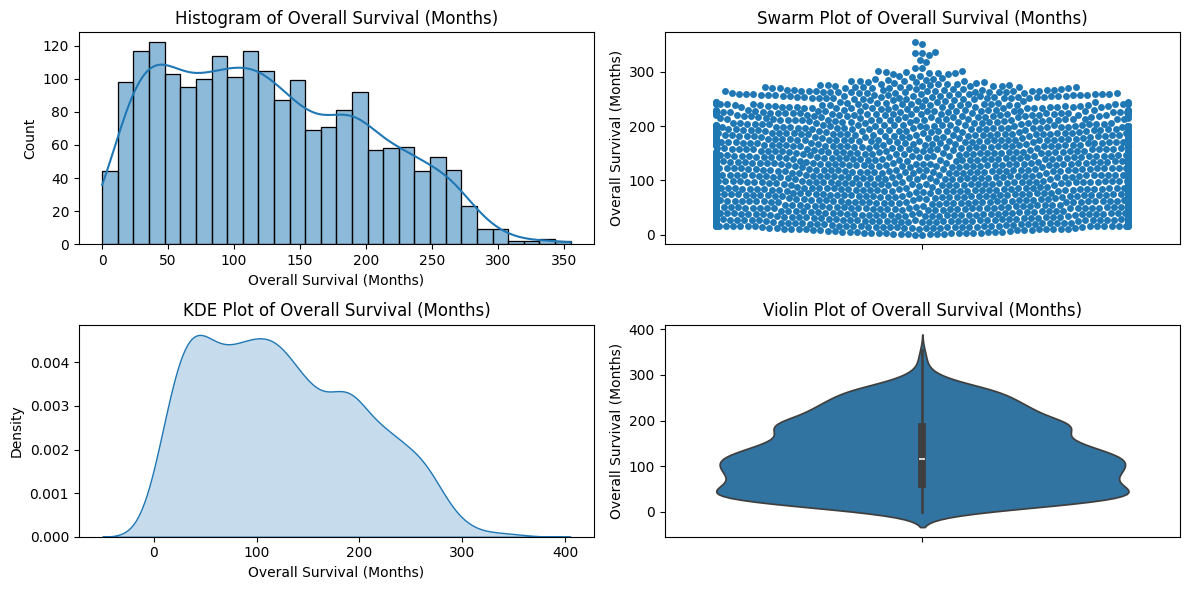

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 47.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


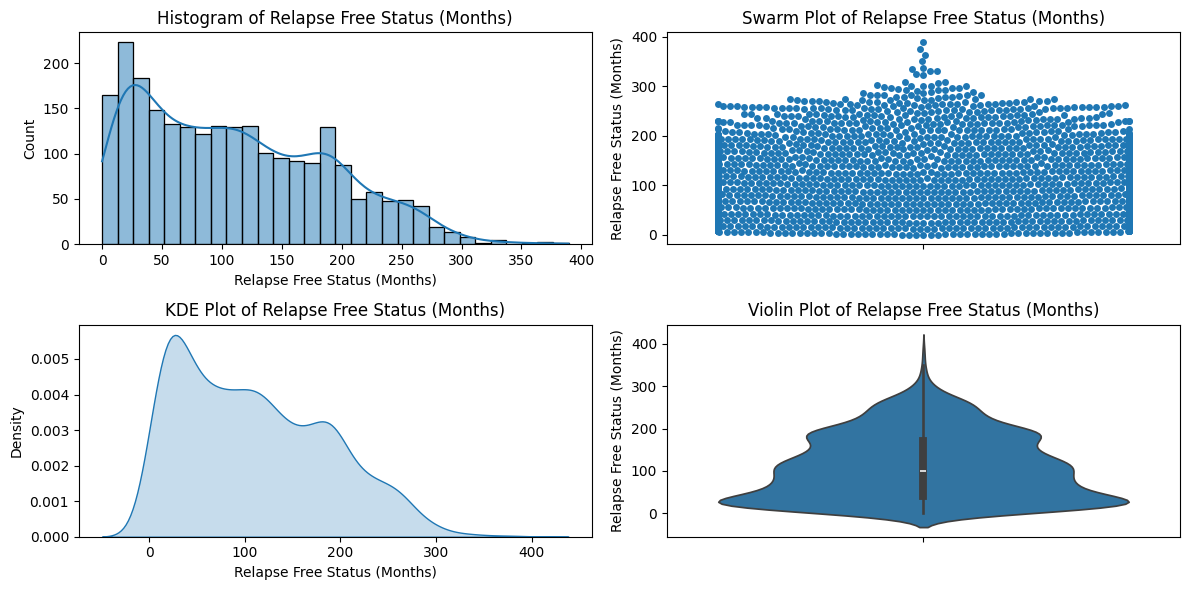

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


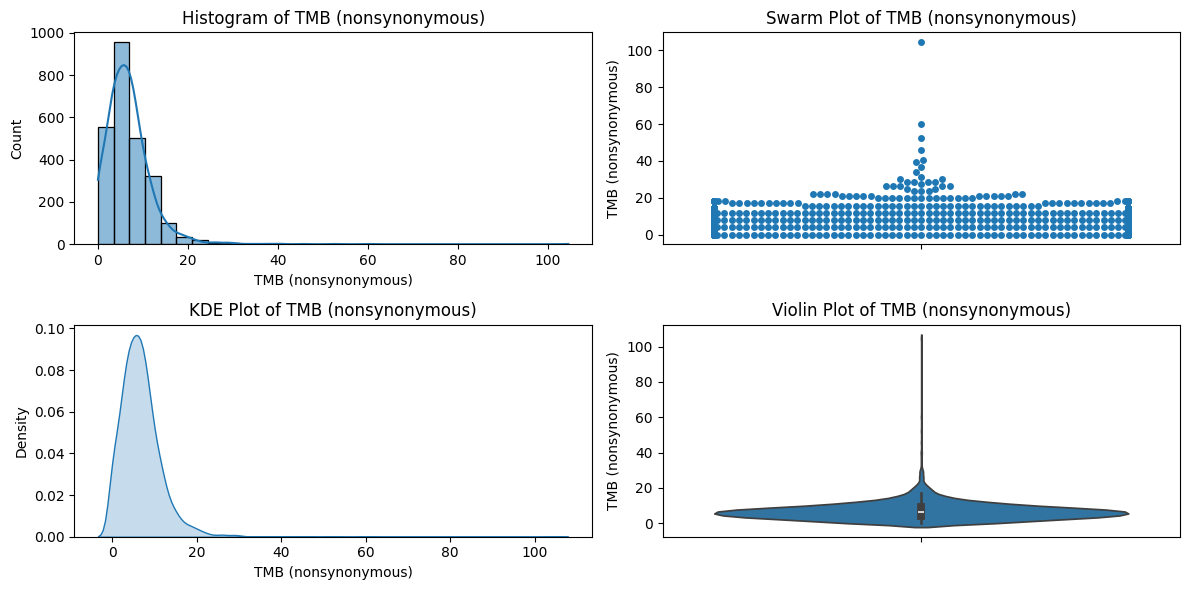

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


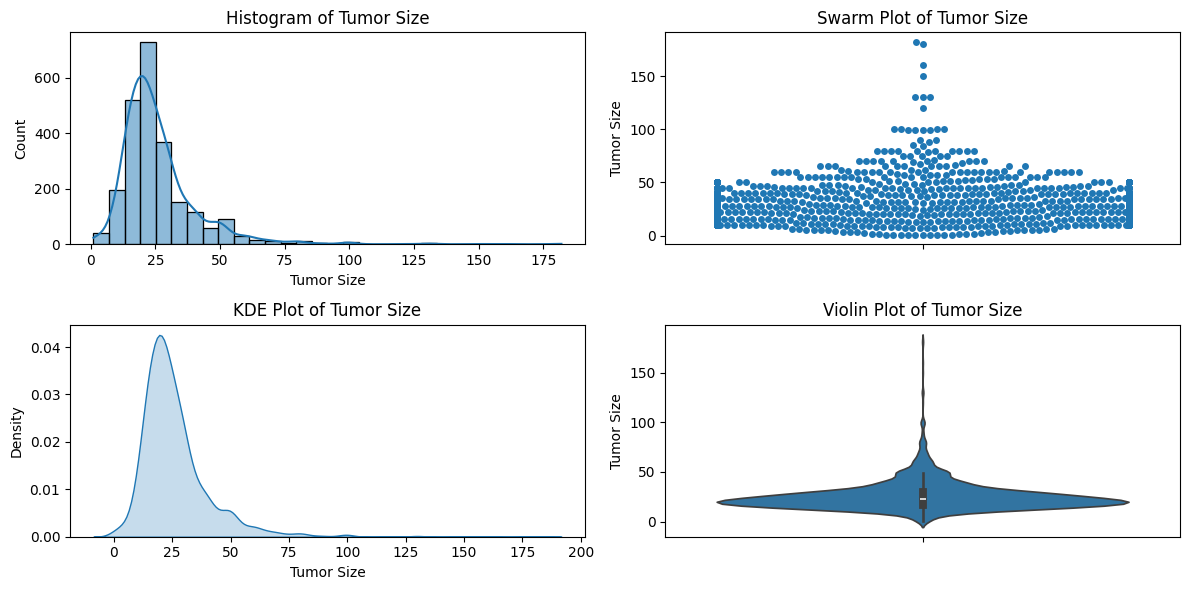

In [7]:
# Taking in the histogram and the histogram variants for all the numerical columns (Some of them are categorical variables and may not be relevant for evaluation)

numerical_cols = clinical_data.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col != 'index']
numerical_cols = [col for col in numerical_cols if col not in [
    'Tumor Stage', 'Number of Samples Per Patient', 'Cohort'
]]

for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(clinical_data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Swarm Plot (Requires categorical grouping)
    plt.subplot(2, 2, 2)
    sns.swarmplot(y=clinical_data[col])
    plt.title(f'Swarm Plot of {col}')
    
    # KDE Plot
    plt.subplot(2, 2, 3)
    sns.kdeplot(clinical_data[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    
    # Violin Plot
    plt.subplot(2, 2, 4)
    sns.violinplot(y=clinical_data[col])
    plt.title(f'Violin Plot of {col}')

    plt.tight_layout()
    plt.show()


# Next, I visualized the relationship between ER status and the tumor size for comparison in the grouped histogram below.

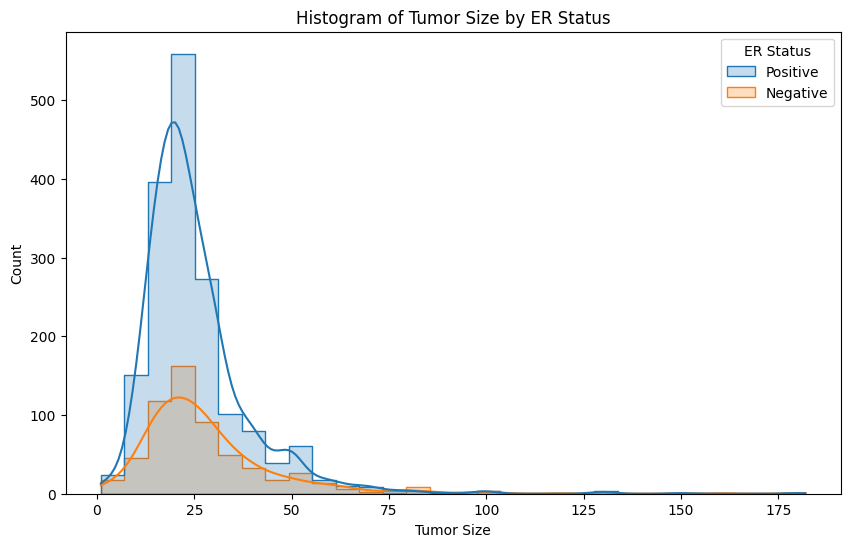

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_data, x='Tumor Size', hue='ER Status', bins=30, kde=True, element='step')
plt.title('Histogram of Tumor Size by ER Status')
plt.show()


# Visualizing the distributions of values in the categorical variables in clinical_data 

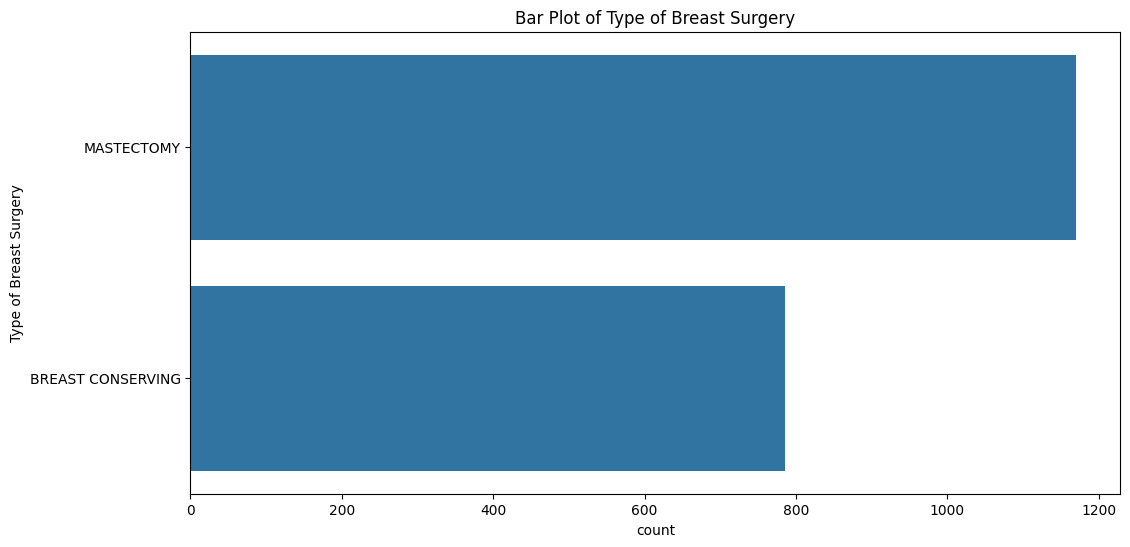

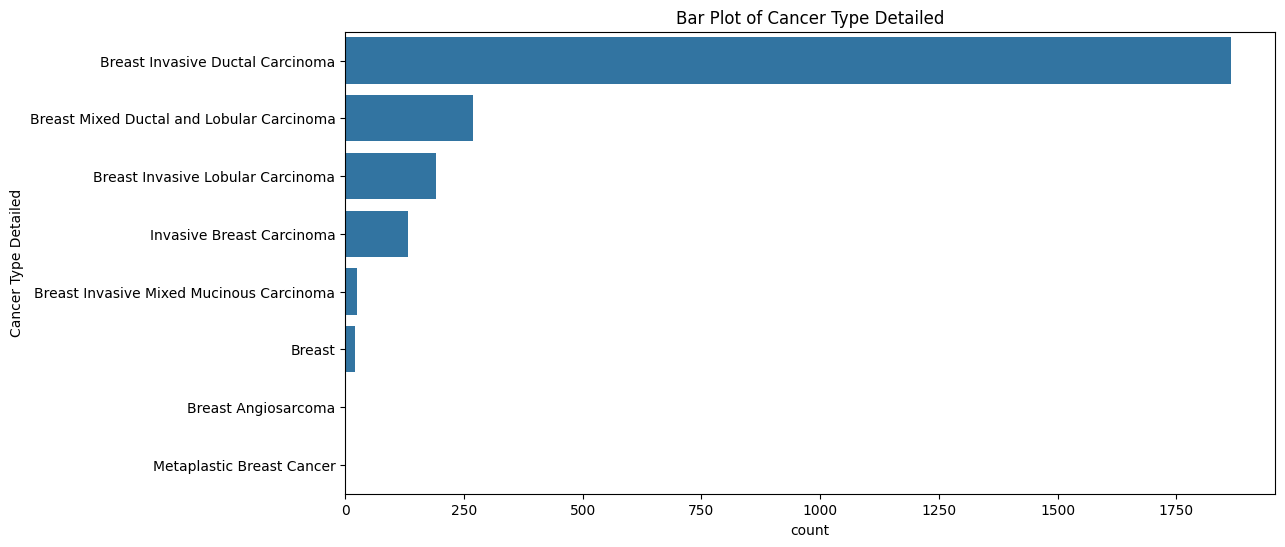

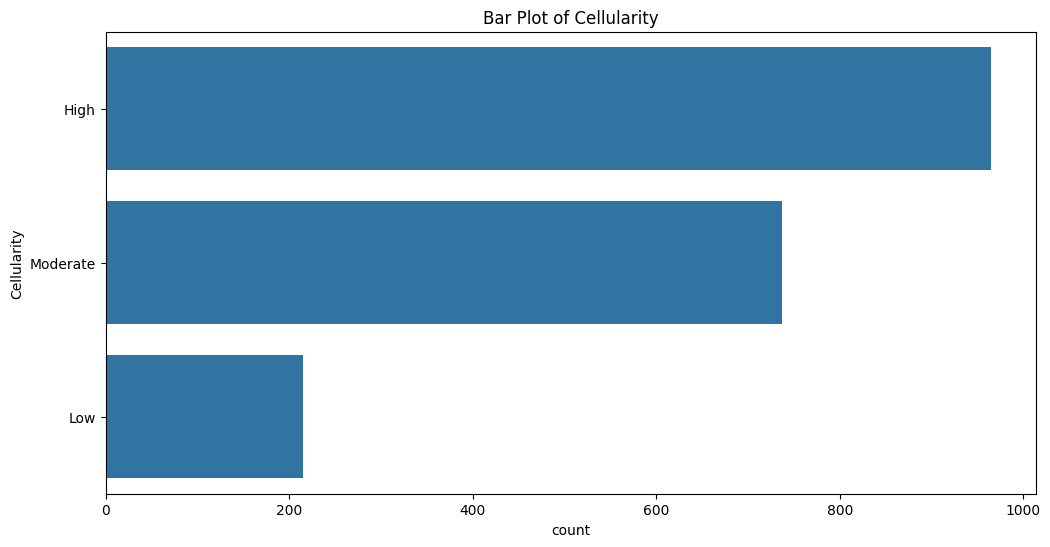

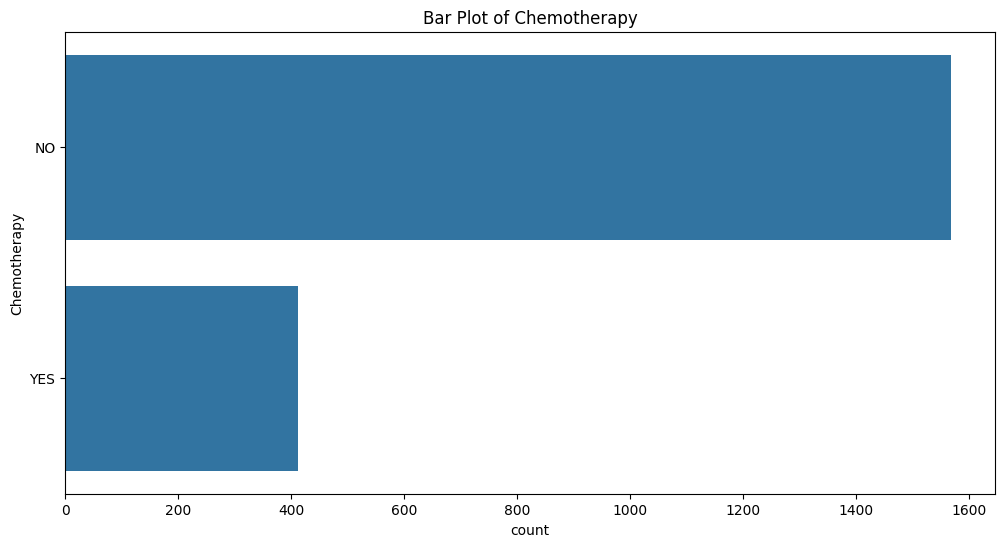

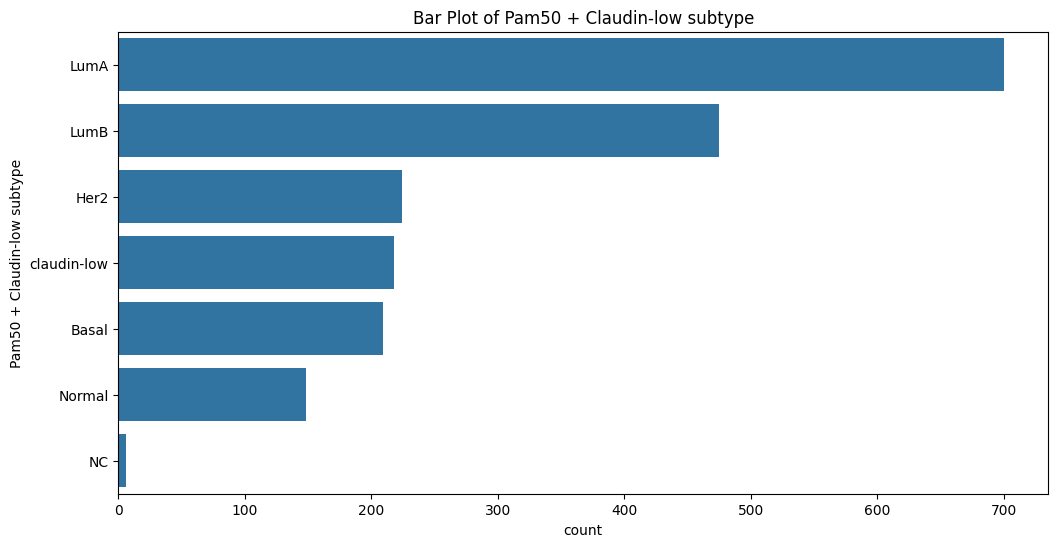

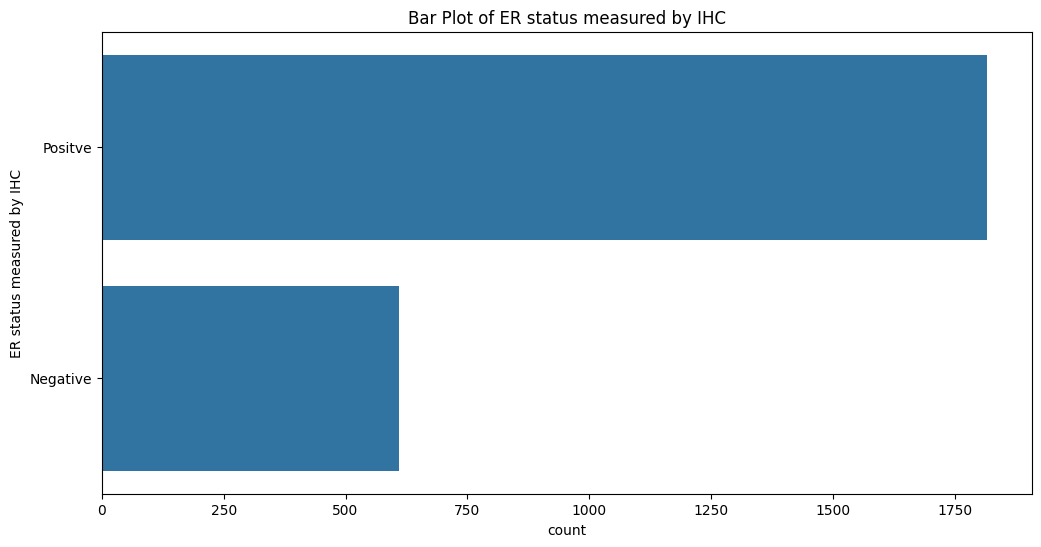

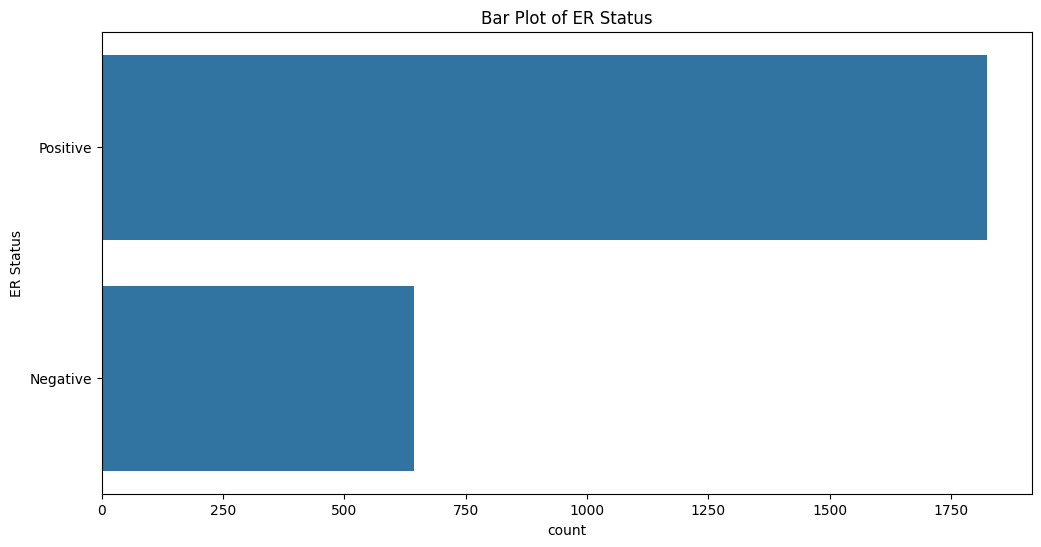

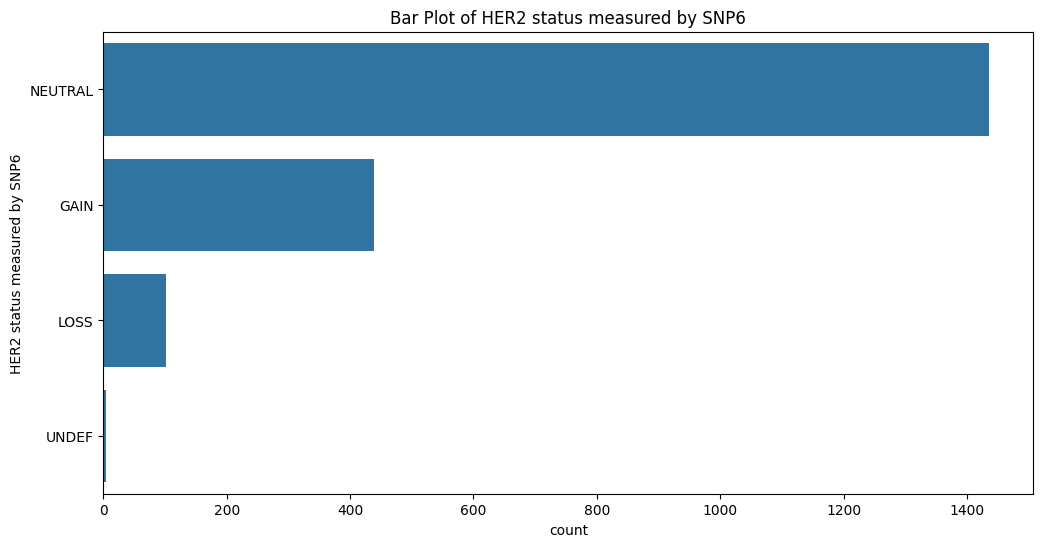

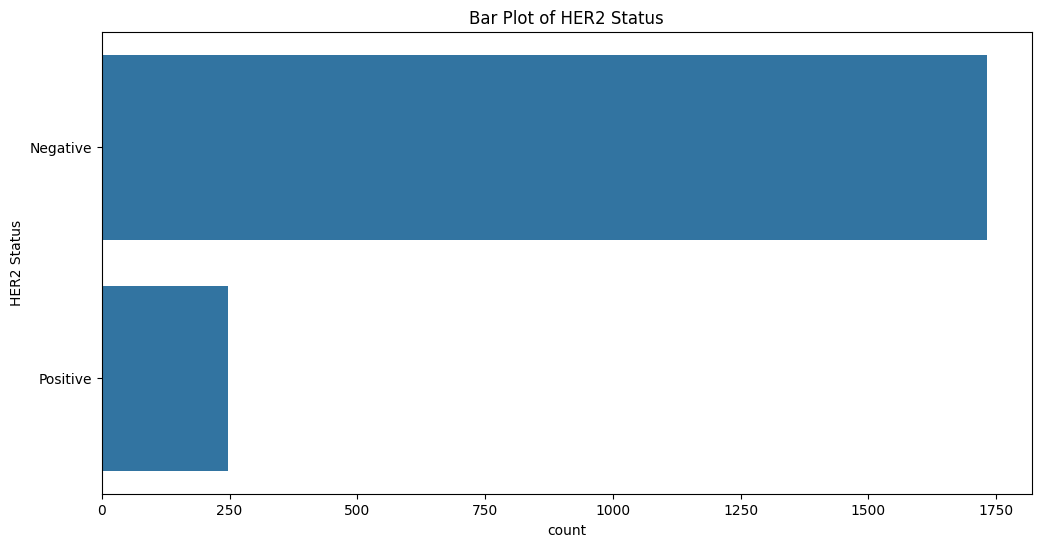

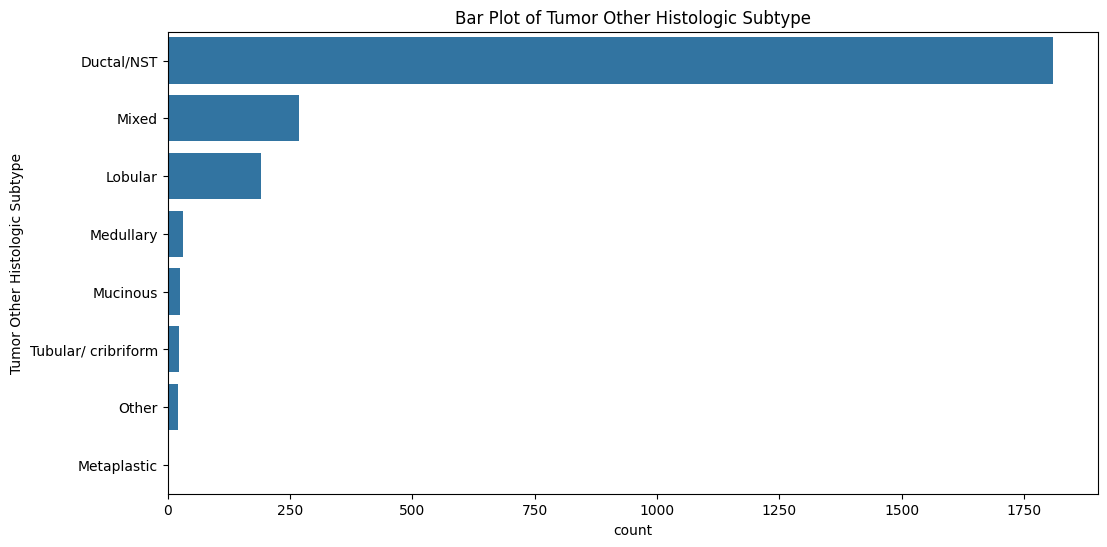

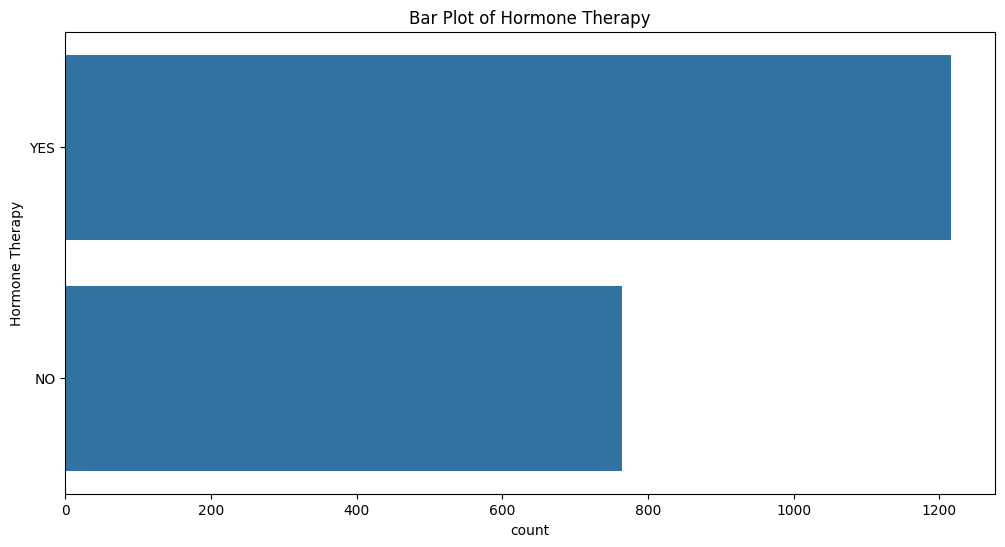

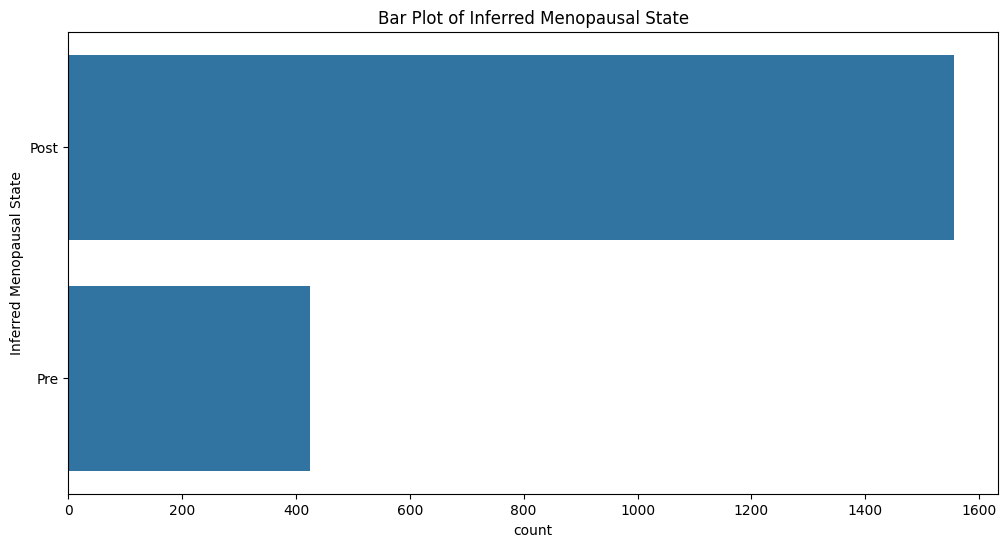

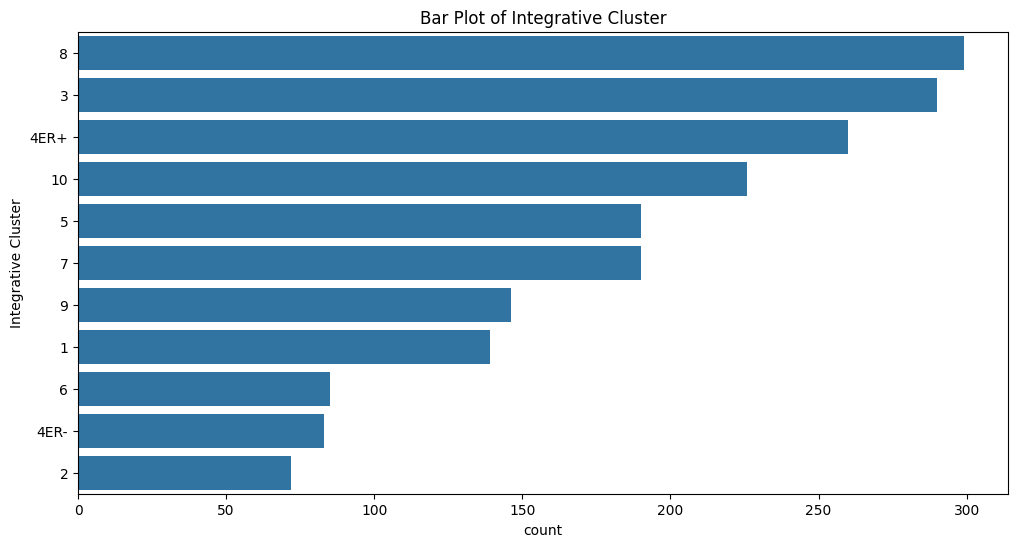

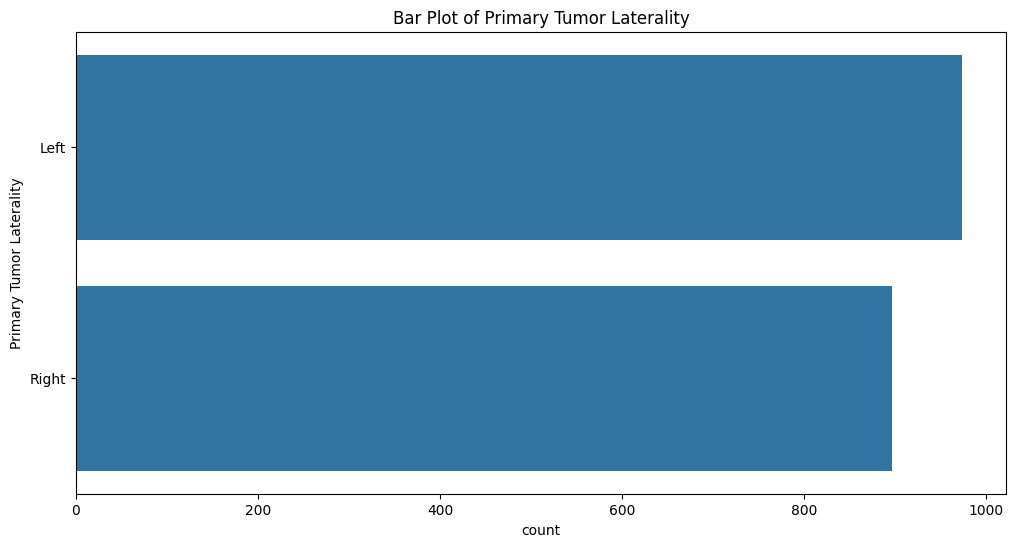

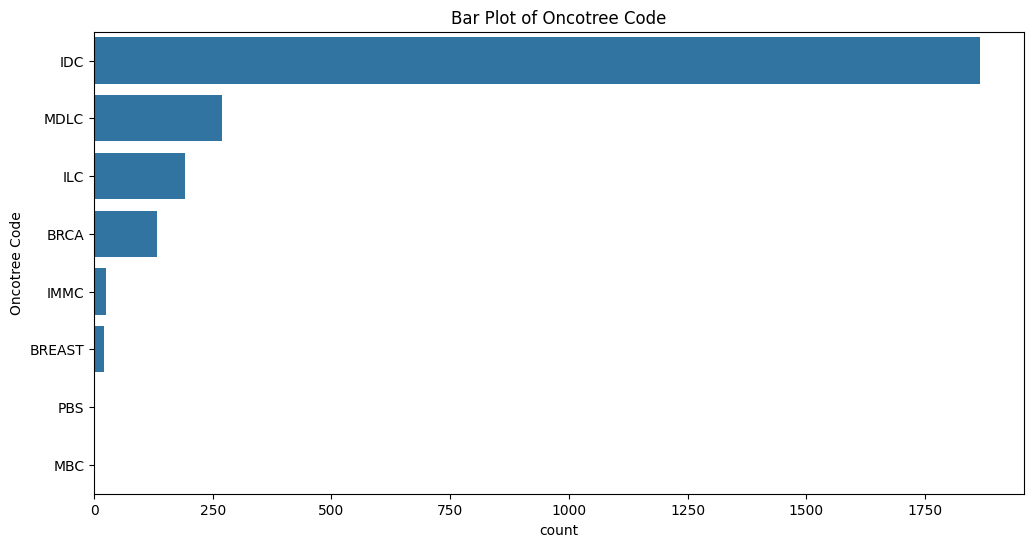

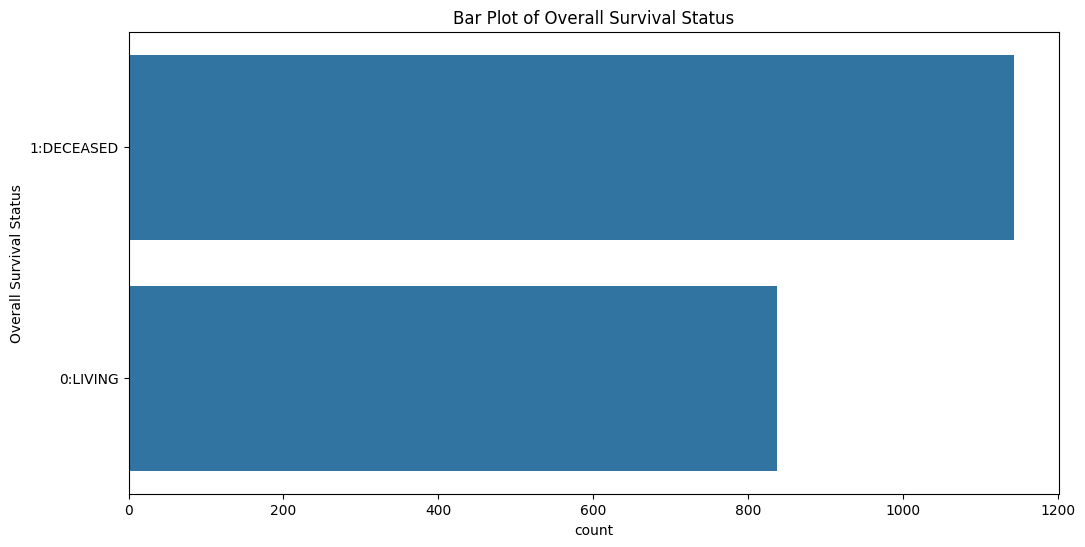

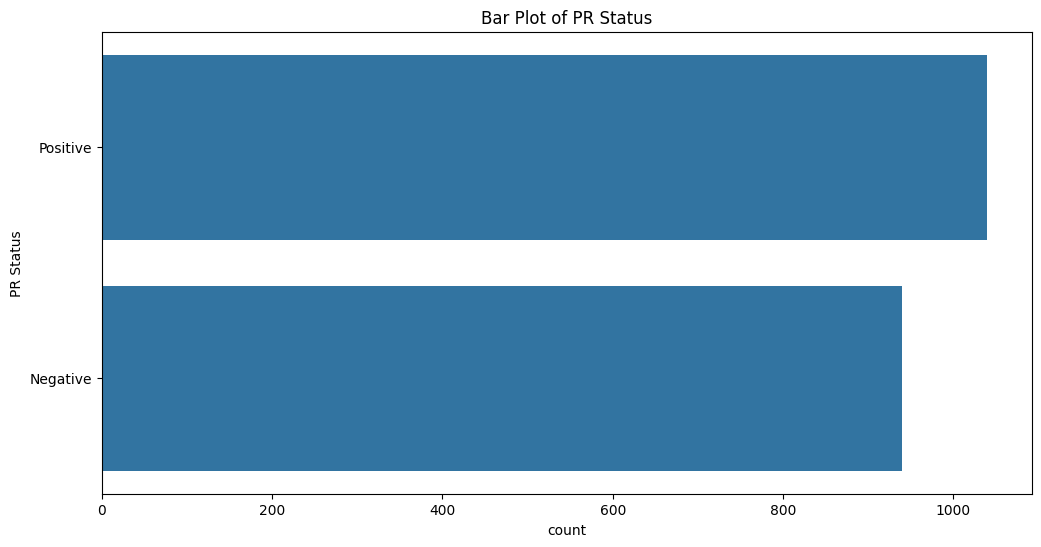

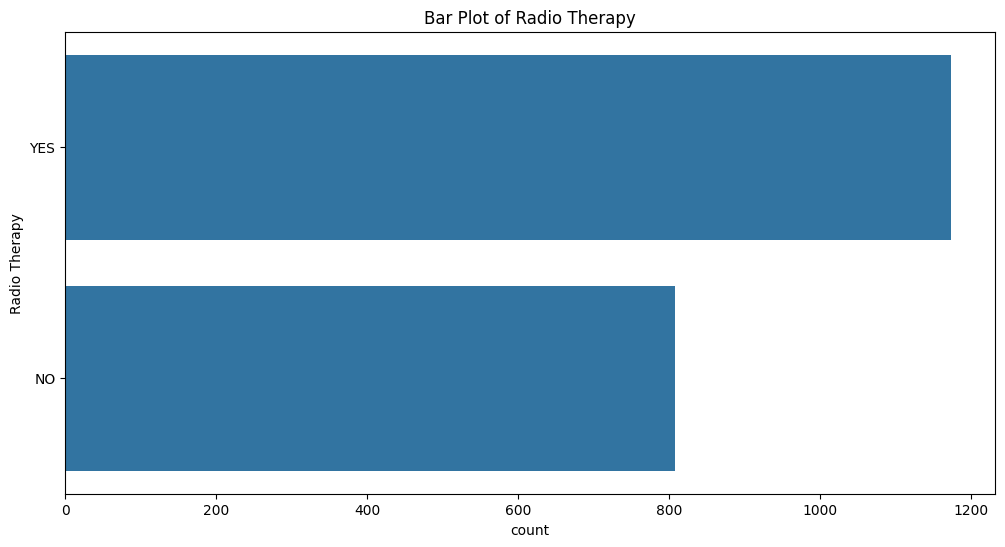

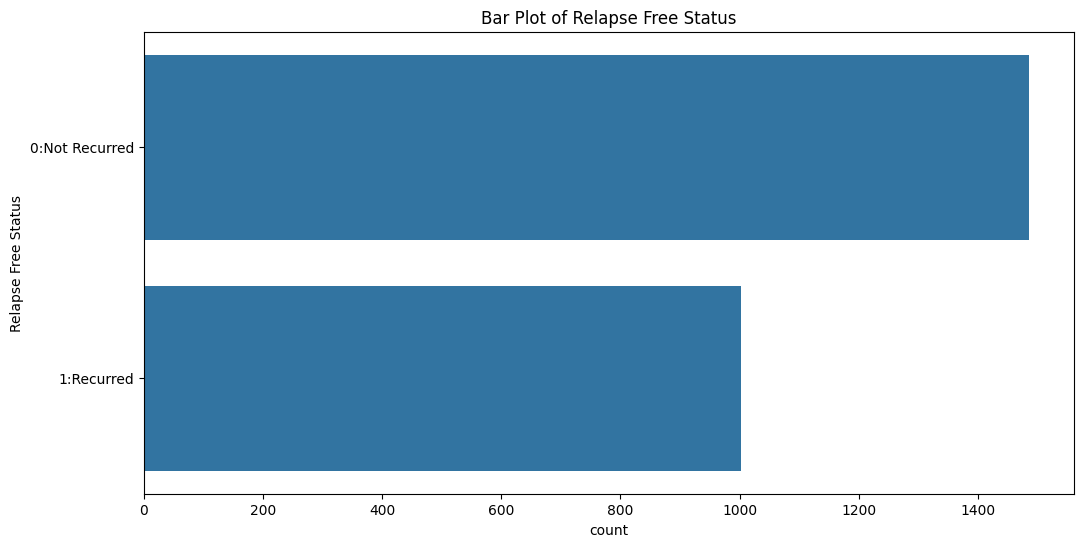

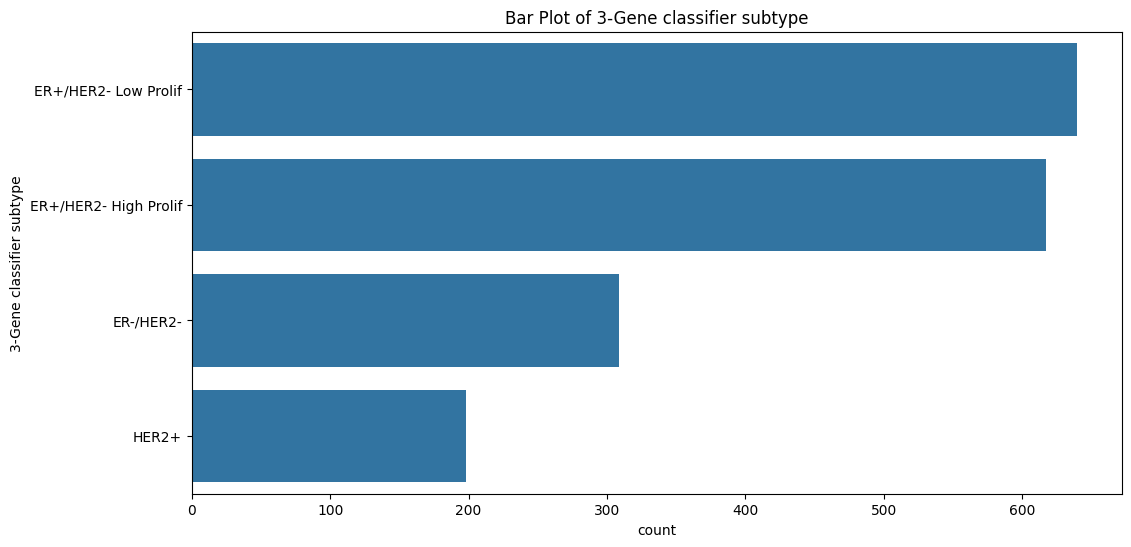

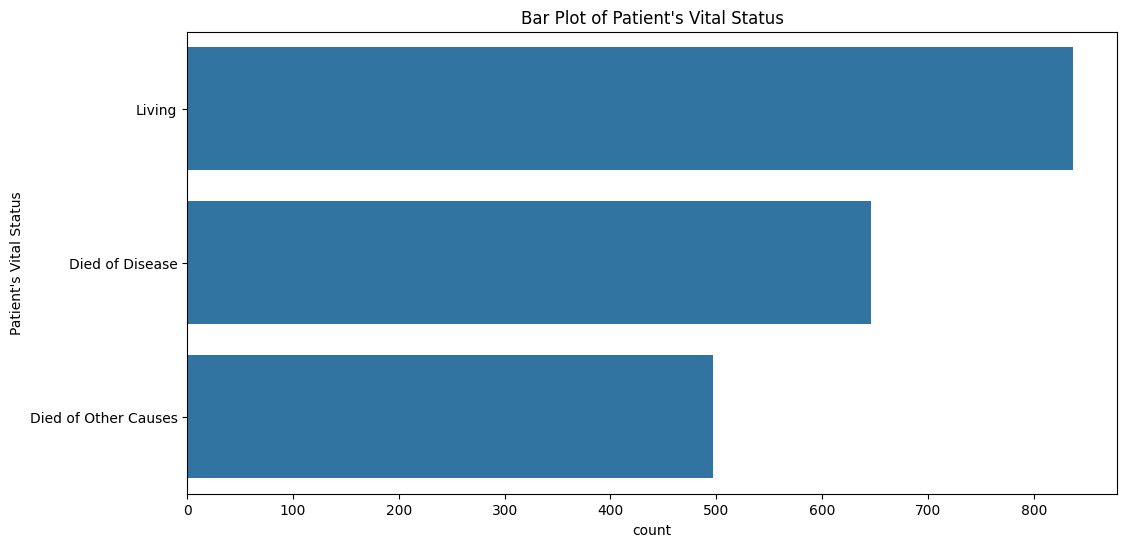

In [6]:
categorical_cols = clinical_data.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col not in [
    'Sex', 'Sample Type', 'Cancer Type', 'Sample ID', 'Patient ID', 'Study ID'
]]

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=clinical_data[col], order=clinical_data[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.show()


# Finding the mean, median, and mode for all the numerical variables

In [5]:
numerical_cols = clinical_data.select_dtypes(include=['number']).columns
numerical_cols = [col for col in numerical_cols if col != 'index']
numerical_cols = [col for col in numerical_cols if col not in [
    'Tumor Stage', 'Number of Samples Per Patient', 'Cohort'
]]


summary_stats = clinical_data[numerical_cols].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
summary_stats.rename(index={'<lambda_0>': 'mode'}, inplace=True)
print(summary_stats)



          Age at Diagnosis  Neoplasm Histologic Grade  \
mean               60.4203                    2.41206   
median             61.1100                    3.00000   
<lambda>           45.0000                    3.00000   

          Lymph nodes examined positive  Mutation Count  \
mean                           1.950513        5.590755   
median                         0.000000        5.000000   
<lambda>                       0.000000        5.000000   

          Nottingham prognostic index  Overall Survival (Months)  \
mean                         4.028787                 125.244271   
median                       4.044000                 116.466667   
<lambda>                     4.040000                 192.200000   

          Relapse Free Status (Months)  TMB (nonsynonymous)  Tumor Size  
mean                        110.293649             6.849746   26.220093  
median                      100.416667             6.537589   22.410000  
<lambda>                     28.000000 

In [6]:
clinical_data[numerical_cols].agg(['min', 'max'])


,Age at Diagnosis,Neoplasm Histologic Grade,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),TMB (nonsynonymous),Tumor Size
min,21.93,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000,1.0
max,96.29,3.0,45.0,81.0,7.2,355.2,389.333333,104.601416,182.0


Answer the questions:
- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
    1. Based on the analysis, the data is to be exoected. Based on the grouped histogram analysis between the ER status and the tumor size, there is favorability in being able to find relevant relationships between the variables.

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
    
    2. Overall, the shape of distribution tends to be skewed, specifically right skewed. This is most likely due to outliers in the data that lean towards large comparions in differentiation from the majority of the data.

- Are there any outliers present?  (Data points that are far from the others.)
    
    3. There are outliers present, as mentioned in the previous statement.

- If there are multiple related histograms, how does the distribution change across different groups?
    
    4. The distribution between multiple related histograms seem to stay consistent.

- What are the minimum and maximum values represented in each histogram?
    
    5. The min/max values for each numeric variable is shown above.

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    
    6. Smaller bin sizes reveal more detailed patterns, such as small peaks and variations. However, it makes the histogram appear noisy. Larger bin sizes smooth out the histogram and show general trends. However, they do obscure finer details.

- Does the distribution appear normal, or does it have a different distribution?
    
    7. The distribution tends to be skewed, specifically right skewed. There are different variations, with one being normal and the other being uniform.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.